Front Line: we want to know which kind of employees have higher risk to quit, and if we could predict the attrition or not.

# HR Analytics: 員工離職預測與分析報告

## 🎯 研究動機
根據企業內部人資資料，我們希望分析影響員工離職的關鍵因素，藉此提出管理改善建議，降低人員流動率。

## ❓ 研究問題
1. 離職員工的共通特徵有哪些？
2. 哪些變數與離職顯著相關？
3. 是否能透過機器學習模型預測員工是否將離職？

# Data Loading and Initial Exploring

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.head() #確認匯入成功

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Check Null and Clean

In [3]:
df.info()  #確認是否需要進行null值的處理，此處不用

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No need to clean!

## Delete Useless Cols

In [4]:
df.drop(['EmployeeCount', 'Over18','StandardHours'], axis = 1, inplace = True)  #移除無用欄位
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Determine This Data's Inportance

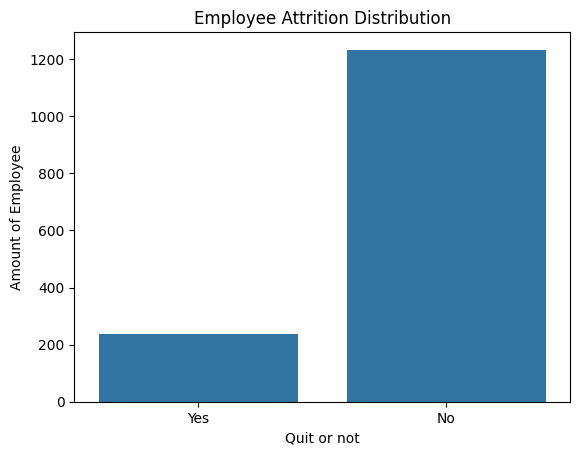

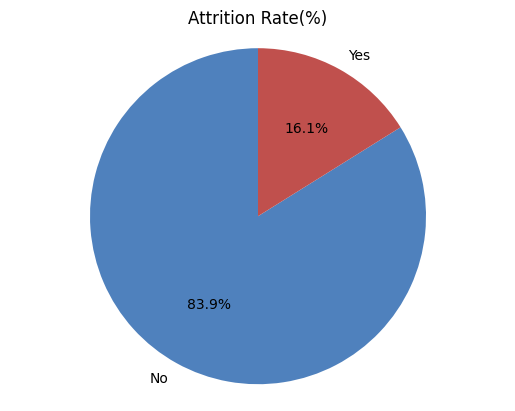

In [5]:
sns.countplot(x = 'Attrition', data = df)
plt.title('Employee Attrition Distribution')
plt.xlabel('Quit or not')
plt.ylabel('Amount of Employee')
plt.show()



labels = df['Attrition'].value_counts().index
sizes = df['Attrition'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4f81bd', '#c0504d'])
plt.title('Attrition Rate(%)')
plt.axis('equal')
plt.show()

In [6]:
#https://www.imercer.com/articleinsights/workforce-turnover-trends
#As the data collected by Mercer.com says, the average of Attrition is about 13.5%
#so now I'm going to check if the sample data is significance to the Population

count = df['Attrition'].value_counts()['Yes']
nobs = len(df)
value = 0.135  #Average Attrition of America

stat, pval = proportions_ztest(count, nobs, value, alternative = 'larger')

print(f"z-score: {stat:.3f}")
print(f"p-value:{pval:.4f}")

z-score: 2.734
p-value:0.0031


Because p-value >= 0.05, and also z-score >= 1.96
so I conclude that the attrition of this company is significant higher than the average,
there might be some issues about the employees in the company.

In [7]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

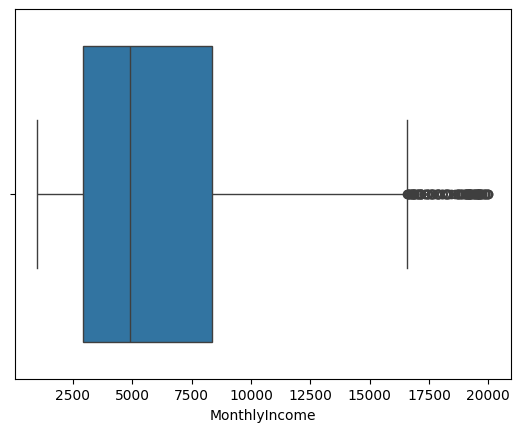

In [8]:
sns.boxplot(x = df['MonthlyIncome'])

plt.show()

## Check if attrition comes from outliers or not

In [9]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df['OutlierIncome'] = (df['MonthlyIncome'] < lower_bound) | (df['MonthlyIncome'] > upper_bound)

In [11]:
quit_df = df[df['Attrition'] == 'Yes']

outlier_count = quit_df['OutlierIncome'].sum()
total_quit = len(quit_df)

proportion = outlier_count / total_quit
print(f"The Quit Proportion of Employee with Outlying Incomes: {proportion:.2%}")

The Quit Proportion of Employee with Outlying Incomes: 2.11%


The quit proportion of employees with outlying income is 2.11%, so most of the attrition comes from normal employees.

## Check if Gender influenced the rate of attrition

In [12]:
cross_tab = pd.crosstab(df["Gender"], df["Attrition"])

cross_tab['Attrition_Rate(%)'] = cross_tab['Yes'] / (cross_tab['Yes'] + cross_tab['No']) * 100
print(cross_tab[['Attrition_Rate(%)']])

Attrition  Attrition_Rate(%)
Gender                      
Female             14.795918
Male               17.006803


Calculate if the proportions have significant difference using two proportion ztest.

In [13]:
male_total = df[df['Gender'] == 'Male'].shape[0]
female_total = df[df['Gender'] == 'Female'].shape[0]

male_quit = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')].shape[0]
female_quit = df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')].shape[0]

count = [male_quit, female_quit]
nobs = [male_total, female_total]

stat, pval = proportions_ztest(count, nobs)

print(f"z-score:{stat:.3f}")
print(f"p-value:{pval:.4f}")

z-score:1.129
p-value:0.2588


z-score < 1.96 and p-value > 0.05, so we don't reject H_0, we don't have enough evidence to prove that there's significant difference between attrition and gender.

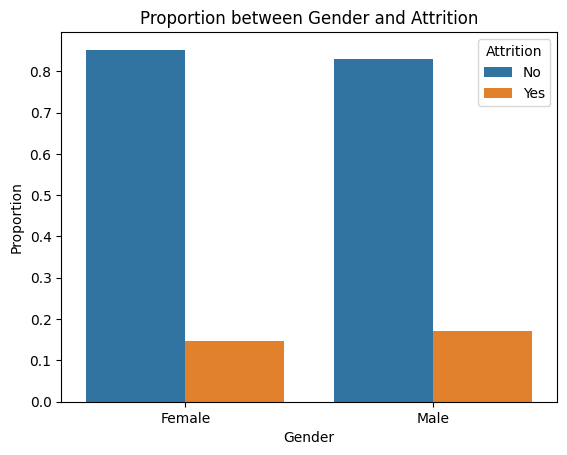

In [14]:
prop_df = (df.groupby(['Gender', 'Attrition']).size() / df.groupby('Gender').size()).reset_index(name='Percent')

sns.barplot(x='Gender', y='Percent', hue='Attrition', data=prop_df)
plt.title('Proportion between Gender and Attrition')
plt.ylabel('Proportion')
plt.show()

## If Education and Eduction Field Have Significant Difference on Attrition

In [15]:
ct = pd.crosstab([df['Education'], df['EducationField']], df['Attrition'], normalize='index') * 100
ct = ct.reset_index().rename(columns={'Yes': 'Attrition(%)'})
print(ct[['Education', 'EducationField', 'Attrition(%)']])

Attrition  Education    EducationField  Attrition(%)
0                  1   Human Resources     50.000000
1                  1     Life Sciences     11.940299
2                  1         Marketing     28.571429
3                  1           Medical     15.873016
4                  1             Other     40.000000
5                  1  Technical Degree     31.578947
6                  2   Human Resources      0.000000
7                  2     Life Sciences     15.517241
8                  2         Marketing     25.000000
9                  2           Medical     15.151515
10                 2             Other      5.263158
11                 2  Technical Degree     18.181818
12                 3   Human Resources     25.000000
13                 3     Life Sciences     15.879828
14                 3         Marketing     25.423729
15                 3           Medical     13.661202
16                 3             Other      8.333333
17                 3  Technical Degree     28.

C:\Users\thoma\AppData\Local\Temp\ipykernel_8516\1857094428.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


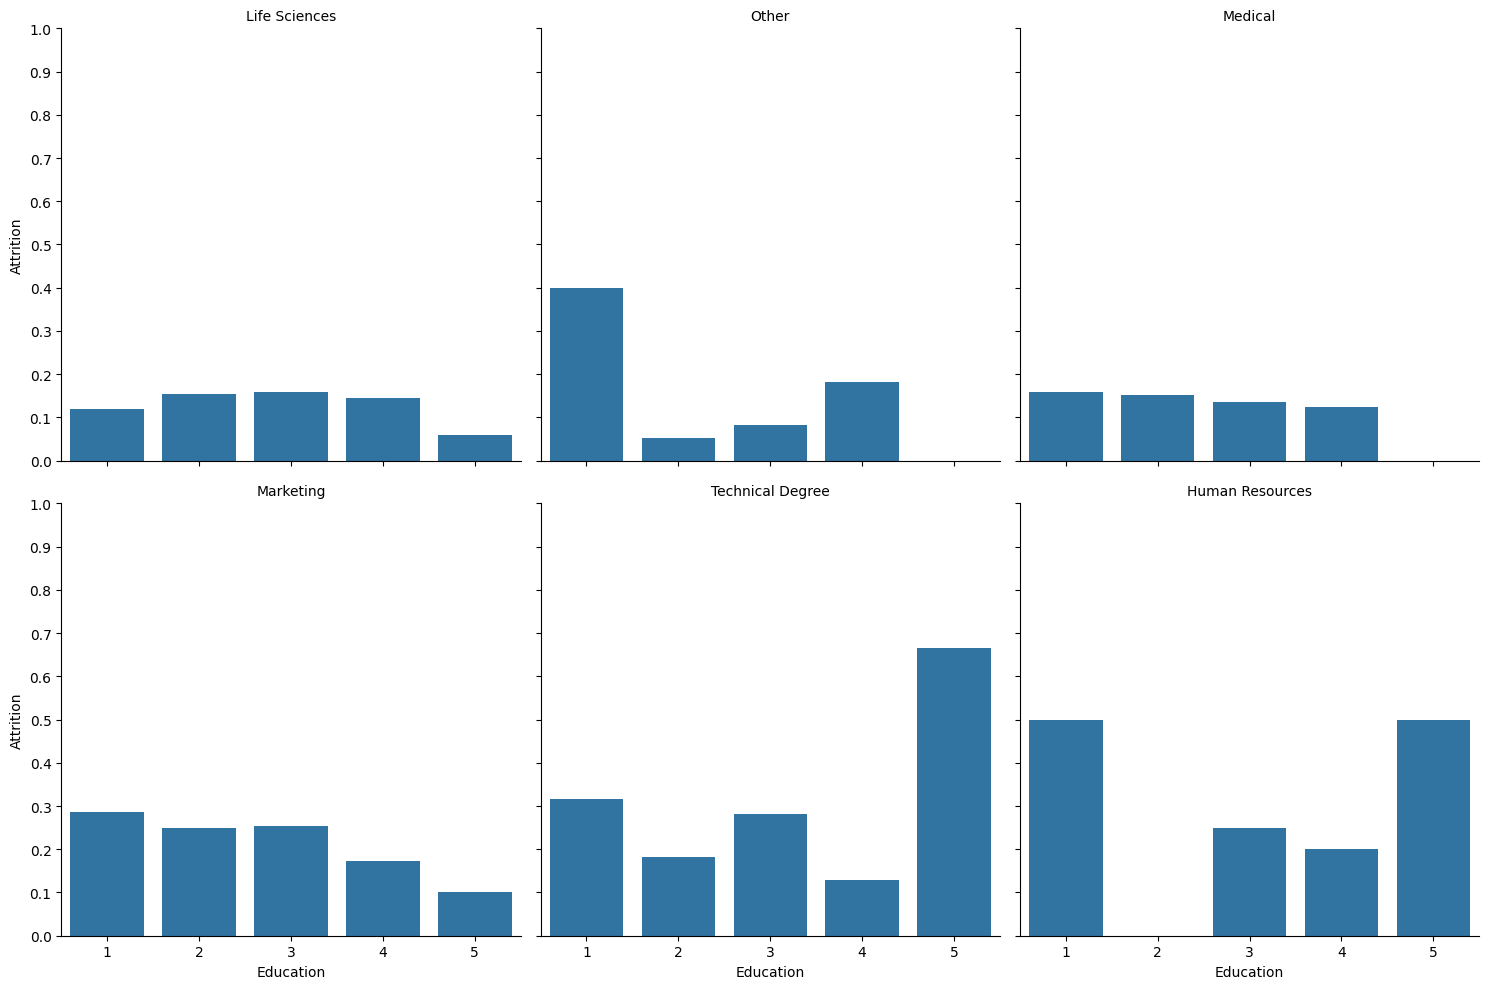

In [16]:
df['Attrition_Flag'] = df['Attrition'].map({'No': 0, 'Yes': 1})

sns.catplot(
    data=df,
    kind='bar',
    x='Education',
    y='Attrition_Flag',
    col='EducationField',
    col_wrap=3,
    estimator='mean',
    ci=None
).set_titles('{col_name}').set_axis_labels("Education", "Attrition")

plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

Employees from HR & technical degree have higher proportion in attrition than 16.1%, there may have problem to discover.

Technical Degree（技術學位）：

教育等級 5（博士等級）離職率高達約 0.7（70%）

明顯偏高，且呈「教育程度越高，離職率越高」的趨勢

可能的推論：

學歷過高但工作內容無法發揮

市場供需不平衡（過度學歷 vs 現實職位）

有其他高就業吸引力的產業可選

Human Resources（人資）：

教育等級 1 和 5 的離職率都高，呈現「U 型」分布

可能的推論：

初學者易離職（學歷低 → 工作適應差）

博士級人資找不到發揮舞台，或工作不符期待

根據教育程度與主修領域交叉分析，我們發現「技術領域與人資領域」的高學歷群體（教育程度為5）離職率明顯偏高，分別達 50% 以上，遠高於整體離職率 16.1%。此現象可能代表該群體在工作設計或職涯發展面向存在不匹配，建議進一步訪談該群體、分析職位適配度與流動原因。